In [22]:
import nltk
from nltk import ChartParser
from nltk.corpus import treebank
import string
import nltk
from nltk import parse, tokenize, Tree, in_idle 
from nltk.draw.util import * 
from nltk.draw.tree import * 
from nltk.draw.cfg import * 


groucho_grammar = nltk.CFG.fromstring(
    """
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas'
    V -> 'shot'
    P -> 'in'
    """)
sentence = """At eight o'clock on Thursday morning... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)

for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


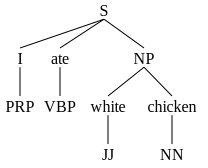

In [38]:
from nltk import pos_tag, word_tokenize

text = 'I ate white chicken'
pattern = """
            NP: {<DT>?<JJ>*<NN>}
            VBD:{<VBD>}
            IN: {<IN>}
        """

NPChunker = nltk.RegexpParser(pattern)
result = NPChunker.parse(pos_tag(word_tokenize(text)))
result

In [57]:
from nltk.parse import stanford
from nltk.parse.stanford import StanfordParser
from nltk.parse.corenlp import CoreNLPDependencyParser
# from nltk.parse import triples 

# for governor, dep, dependent in parse.triples():
    # print(governor, dep, dependent)  

In [66]:
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
s.split() 
s.split(' ') 
s.split('\n') 

from nltk.tokenize.simple import CharTokenizer
from nltk.tokenize import LineTokenizer
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."
LineTokenizer(blanklines='keep').tokenize(s) 
LineTokenizer(blanklines='discard').tokenize(s) 

['Good muffins cost $3.88',
 'in New York.  Please buy me',
 'two of them.',
 'Thanks.']

In [30]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


In [27]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span):
            end = start + span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                        (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst

def display(wfst, tokens):
    print('\nWFST ' + ' '.join(("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst)-1):
        print("%d   " % i, end=" ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end=" ")
        print()

tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    .    .    .    .    
1    .    V    .    .    .    .    .    
2    .    .    Det  .    .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    .    
5    .    .    .    .    .    Det  .    
6    .    .    .    .    .    .    N    


In [29]:
wfst1 = complete_wfst(wfst0, tokens, groucho_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    S    .    .    S    
1    .    V    .    VP   .    .    VP   
2    .    .    Det  NP   .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    PP   
5    .    .    .    .    .    Det  NP   
6    .    .    .    .    .    .    N    


In [32]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
... 'shot' -> 'I' | 'elephant' | 'in'
... 'elephant' -> 'an' | 'in'
... 'in' -> 'pajamas'
... 'pajamas' -> 'my'
... """)
print(groucho_dep_grammar)

 	
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
    print(tree)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'
(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


In [33]:
sr_parser = nltk.ShiftReduceParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))
